# Object Detection

two methods:
* Detect a moving object - Optical Flow 
* Detect drone purely from image processing -- not working
* deep learning

## for the second approach


* try watershed algorithm  -- didn't get good results
* try corner detection  -- satisfactory results --not so much

* ensemble of both

* grabCut

*


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cd

In [ ]:
cd drone-defense-wall/

In [ ]:
img=cv2.imread("data/drone.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
blur_img=cv2.medianBlur(img,5)

In [ ]:
plt.imshow(blur_img)

In [ ]:
gray_img=cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)

In [ ]:
plt.imshow(gray_img,cmap="gray")

In [ ]:
gray_img.max()

In [ ]:
ret,sep_thresh=cv2.threshold(gray_img,160,255,cv2.THRESH_BINARY_INV)

In [ ]:
plt.imshow(sep_thresh,cmap='gray')

# Corner Detection

In [ ]:
drone=img

In [ ]:
gray_drone=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [ ]:
plt.imshow(gray_drone,cmap='gray')

In [ ]:
# let's do this on the actual image

gray=np.float32(gray_drone)

#corner_harris_detection 
dst=cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

#reusly is dilated for marking the corners, not important for actual corner deetection
# this is just so we can plot out the points on the image
dst=cv2.dilate(dst,None)

# threshold for an optimal value, it may vary depending on the image
drone[dst>0.01*dst.max()]=[255,0,0]
plt.imshow(drone)

In [ ]:
plt.imshow(dst,cmap='gray')

In [ ]:
dst

In [ ]:
img.shape

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
  
# path to input image specified and
# image is loaded with imread command
image = drones
  
# create a simple mask image similar
# to the loaded image, with the
# shape and return type
mask = np.zeros(image.shape[:2], np.uint8)
  
# specify the background and foreground model
# using numpy the array is constructed of 1 row
# and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
  
# define the Region of Interest (ROI)
# as the coordinates of the rectangle
# where the values are entered as
# (startingPoint_x, startingPoint_y, width, height)
# these coordinates are according to the input image
# it may vary for different images
rectangle = (20, 100, 150, 150)
  
# apply the grabcut algorithm with appropriate
# values as parameters, number of iterations = 3
# cv2.GC_INIT_WITH_RECT is used because
# of the rectangle mode is used
cv2.grabCut(image, mask, rectangle, 
            backgroundModel, foregroundModel,
            3, cv2.GC_INIT_WITH_RECT)
  
# In the new mask image, pixels will
# be marked with four flags
# four flags denote the background / foreground
# mask is changed, all the 0 and 2 pixels
# are converted to the background
# mask is changed, all the 1 and 3 pixels
# are now the part of the foreground
# the return type is also mentioned,
# this gives us the final mask
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
  
# The final mask is multiplied with
# the input image to give the segmented image.
image = image * mask2[:, :, np.newaxis]
  
# output segmented image with colorbar
plt.imshow(image)
plt.colorbar()
plt.show()

# feature matching

In [ ]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(18,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')


In [ ]:
cd drone-defense-wall/

In [ ]:
img=cv2.imread('data/cropped_drone.jpg',0)

In [ ]:
drones = cv2.imread('data/drone2.jpg') 

In [ ]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(drones,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(img,kp1,drones,kp2,matches,None,**draw_params)

In [ ]:
plt.imshow(flann_matches)

In [ ]:
plt.imshow(img)

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = drones
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [ ]:
plt.imshow(drones)

In [ ]:
cd drone-defense-wall/data

In [ ]:
import cv2

In [ ]:
cv2.VideoCapture()

In [ ]:
# dense optical flow
import cv2 as cv
import numpy as np
  
  
# The video feed is read in as
# a VideoCapture object
cap = cv.VideoCapture("cam0.mp4")
  
# ret = a boolean return value from
# getting the frame, first_frame = the
# first frame in the entire video sequence
ret, first_frame = cap.read()
  
# Converts frame to grayscale because we
# only need the luminance channel for
# detecting edges - less computationally 
# expensive
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
  
# Creates an image filled with zero
# intensities with the same dimensions 
# as the frame
mask = np.zeros_like(first_frame)
  
# Sets image saturation to maximum
mask[..., 1] = 255
  
while(cap.isOpened()):
      
    # ret = a boolean return value from getting
    # the frame, frame = the current frame being
    # projected in the video
    ret, frame = cap.read()
      
    # Opens a new window and displays the input
    # frame
    cv.imshow("input", frame)
      
    # Converts each frame to grayscale - we previously 
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
      
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                       None,
                                       0.5, 3, 15, 3, 5, 1.2, 0)
      
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
      
    # Sets image hue according to the optical flow 
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
      
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
      
    # Opens a new window and displays the output frame
    plt.imshow("dense optical flow", rgb)
      
    # Updates previous frame
    prev_gray = gray
      
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
  
# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()

In [2]:
cd

/home/dhruv


In [7]:
cd drone-defense-wall/data

/home/dhruv/drone-defense-wall/data


In [4]:
cd

/home/dhruv


In [5]:
ls

 a.out                                       momentum-trader/
'big ass 8.pdf'                              Music/
 Desktop/                                    openCV-practice/
 dip_notes_with_love_dhruv.pdf               Pictures/
 Documents/                                  Public/
 Downloads/                                  Templates/
 drone-defense-wall/                         tor-browser/
 drone-detection/                            Untitled1.ipynb
 google-chrome/                              Untitled.ipynb
 happiest-minds-episode-2-stackroute.ipynb   Videos/
 killing-drones/                             yay/
 microsoft-edge-stable-bin/


In [8]:
#!/usr/bin/env python
'''
Usage:
./ssearch.py input_image (f|q)
f=fast, q=quality
Use "l" to display less rects, 'm' to display more rects, "q" to quit.
'''

import sys
import cv2


# If image path and f/q is not passed as command
# line arguments, quit and display help message
if len(sys.argv) < 3:
    print(__doc__)
    sys.exit(1)

# speed-up using multithreads
cv2.setUseOptimized(True);
cv2.setNumThreads(4);

# read image
im = cv2.imread("155.jpg")
# resize image
newHeight = 200
newWidth = int(im.shape[1]*200/im.shape[0])
im = cv2.resize(im, (newWidth, newHeight))    

# create Selective Search Segmentation Object using default parameters
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

# set input image on which we will run segmentation
ss.setBaseImage(im)

# Switch to fast but low recall Selective Search method
#if (sys.argv[2] == 'f'):
ss.switchToSelectiveSearchFast()

# Switch to high recall but slow Selective Search method
# elif (sys.argv[2] == 'q'):
#     ss.switchToSelectiveSearchQuality()
# # if argument is neither f nor q print help message
# else:
#     print(__doc__)
#     sys.exit(1)

# run selective search segmentation on input image
rects = ss.process()
print('Total Number of Region Proposals: {}'.format(len(rects)))

# number of region proposals to show
numShowRects = 100
# increment to increase/decrease total number
# of reason proposals to be shown
increment = 50

while True:
    # create a copy of original image
    imOut = im.copy()

    # itereate over all the region proposals
    for i, rect in enumerate(rects):
        # draw rectangle for region proposal till numShowRects
        if (i < numShowRects):
            x, y, w, h = rect
            cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        else:
            break

    # show output
    cv2.imshow("Output", imOut)

    # record key press
    k = cv2.waitKey(0) & 0xFF

    # m is pressed
    if k == 109:
        # increase total number of rectangles to show by increment
        numShowRects += increment
    # l is pressed
    elif k == 108 and numShowRects > increment:
        # decrease total number of rectangles to show by increment
        numShowRects -= increment
    # q is pressed
    elif k == 113:
        break
# close image show window
cv2.destroyAllWindows()


Total Number of Region Proposals: 299


In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
cd

/home/dhruv


In [15]:
img = cv2.imread('1')

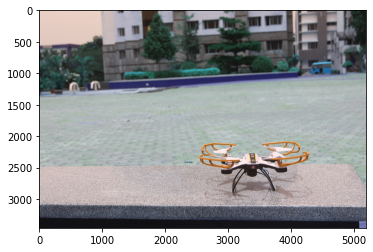

In [16]:
plt.imshow(img)